### Pythonコンピュータシミュレーション入門 ―人文・自然・社会科学の数理モデル―(P110 5.1.1 人口モデルを参照)
非線形最適化を利用して、初期人口、収容人口、成長率を最適化する

### ロジスティック成長モデル

ロジスティック成長モデルは、ある個体群が環境の持続可能な上限（環境収容力 $K$）に達するまでの成長を記述するモデルです。このモデルの基本的な微分方程式は以下の通りです：

$$
\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right)
$$

ここで、
- $N$ は時間 $t$ における個体数
- $r$ は内在的増加率
- $K$ は環境収容力

### 解析的解法

この微分方程式を解くためには、変数分離法を使用します：

1. **変数分離**:
   両辺に $ \frac{1}{N(1 - \frac{N}{K})} $ を掛けて、変数を分離します。

   $$
   \frac{dN}{N(1 - \frac{N}{K})} = r dt
   $$

2. **積分**:
   両辺を積分します。左辺の積分は部分分数分解を用いて、

   $$
   \int \left(\frac{1}{N} + \frac{1/K}{1 - \frac{N}{K}}\right) dN = \ln |N| - \ln |1 - \frac{N}{K}|
   $$

   これにより、

   $$
   \ln \left|\frac{N}{1 - \frac{N}{K}}\right| = rt + C
   $$

3. **整理と解の導出**:
   上式を指数関数形式に変換し、$N$ について解きます。

   $$
   \frac{N}{1 - \frac{N}{K}} = e^{rt + C}
   $$

   $$
   N = \frac{Ke^{rt + C}}{1 + e^{rt + C}}
   $$

   初期条件 $N(0) = N_0$ を使用して定数 $C$（あるいは $e^C$ を $A$ とおいて）を求め、

   $$
   N(t) = \frac{K}{1 + \left(\frac{K - N_0}{N_0}\right)e^{-rt}}
   $$

この形式で、個体数 $N(t)$ は時間が経つにつれて環境収容力 $K$ に収束する様子を示します。


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

%matplotlib inline

#### 計算の簡略化のため，xのデータは西暦でなく，0から始まる整数とする。

In [7]:
# 1. データの準備：
#1980 -  2010, 5年毎の日本の総人口，単位：千人
y = np.array([117060, 121049, 123611, 125570, 126926, 127768, 128057])
x = np.arange(0,len(y))
# 2012年から総人口は減少に転じている

In [8]:
# 2. モデル関数の定義：func 関数は、与えられた時間tでの人口pを計算するためのロジスティック成長モデルの式を実装しています。パラメータp0, pinf, gammaはそれぞれ初期人口、最大人口、成長率を表しています。
def func(t, p0, pinf, gamma):
    p = pinf/( 1.0 + (pinf/p0 - 1.0)*np.exp(-gamma*t))
    return p

In [10]:
# 3. パラメータの最適化：opt.curve_fit 関数を使用して、与えられた人口データに最もよくフィットするパラメータ(p0, pinf, gamma)を見つけています。初期推定値としてp0=[110000, 130000, 0.6]を使用しています。
#最適化されたパラメータの配列です。この例では、ロジスティック成長モデルのパラメータ p0, pinf, gamma の推定値が含まれています。p0 は初期人口、pinf は環境収容力（人口が安定する最大値）、gamma は成長率を表します。
#pcov:共分散行列です。この行列は、フィットされたパラメータの不確かさを示し、各パラメータの推定の精度を評価するのに役立ちます。対角要素は各パラメータの分散を、非対角要素はパラメータ間の共分散を示します。この行列の平方根を取ることで、各パラメータの標準偏差（誤差の大きさ）を求めることができます。
popt, pcov = opt.curve_fit(func, x, y, p0=[110000, 130000, 0.6])
popt

array([1.17056673e+05, 1.29238545e+05, 4.24640177e-01])

In [11]:
# 4. 推定人口の計算：pest は、最適化されたパラメータを使用して、与えられた年数xに対する推定人口を計算しています。
pest= popt[1]/( 1.0 + (popt[1]/popt[0] - 1.0)*np.exp(-popt[2]*x))

x2 = np.arange(-10, 20, 1)
pest2= popt[1]/( 1.0 + (popt[1]/popt[0] - 1.0)*np.exp(-popt[2]*x2))

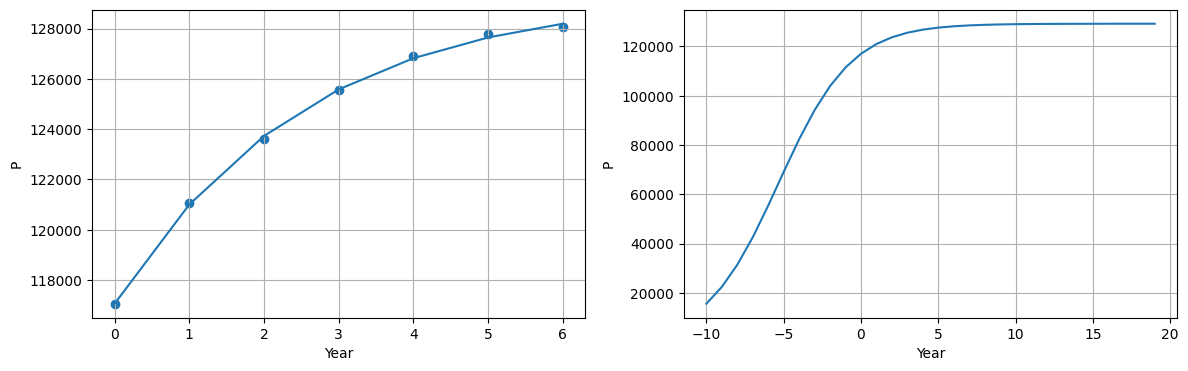

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))

axs[0].plot(x, pest)
axs[0].scatter(x, y)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('P')
axs[0].grid()

axs[1].plot(x2, pest2)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('P')
axs[1].grid()

#plt.savefig('fig_NS_Population_01.png', bbox_inches='tight')
plt.show()

決定係数 R²: 0.9993866840283885
平均二乗誤差 MSE: 8596.20807007234


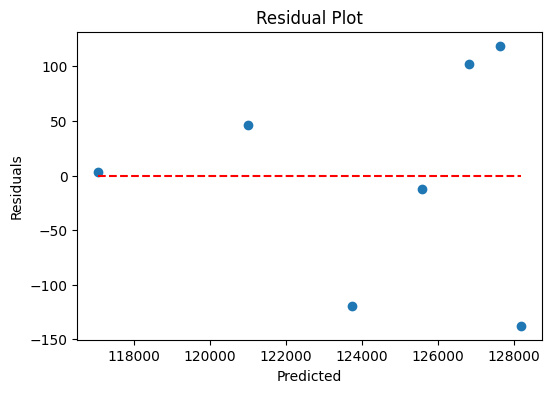

In [16]:
#モデル評価
from sklearn.metrics import mean_squared_error, r2_score

# 実データ
y_true = y
# モデルによる予測値
y_pred = pest

# R²の計算
r2 = r2_score(y_true, y_pred)
print("決定係数 R²:", r2)

# MSEの計算
mse = mean_squared_error(y_true, y_pred)
print("平均二乗誤差 MSE:", mse)

# 残差プロット
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, y_true - y_pred)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
